### Importing Libraries and Utils

In [1]:
!pip install torchsummary

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar_test_nolabels.pkl
/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py/batches.meta
/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py/test_batch
/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py/readme.html
/kaggle/input/resnet50/pytorch/res50_v1/1/res50_1.pth


In [3]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader, Subset
from torch.utils.data.sampler import SubsetRandomSampler

In [4]:
# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [5]:
'''import os
import sys
import time
import math

import torch
import torch.nn as nn
import torch.nn.init as init

def get_mean_and_std(dataset):
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)
    mean = torch.zeros(3)
    std = torch.zeros(3)
    print('==> Computing mean and std..')
    for inputs, targets in dataloader:
        for i in range(3):
            mean[i] += inputs[:,i,:,:].mean()
            std[i] += inputs[:,i,:,:].std()
    mean.div_(len(dataset))
    std.div_(len(dataset))
    return mean, std

def init_params(net):
    for m in net.modules():
        if isinstance(m, nn.Conv2d):
            init.kaiming_normal_(m.weight, mode='fan_out')
            if m.bias is not None:
                init.constant_(m.bias, 0)
        elif isinstance(m, nn.BatchNorm2d):
            init.constant_(m.weight, 1)
            init.constant_(m.bias, 0)
        elif isinstance(m, nn.Linear):
            init.normal_(m.weight, std=1e-3)
            if m.bias is not None:
                init.constant_(m.bias, 0)

# Set a default value for term_width
term_width = 80

TOTAL_BAR_LENGTH = 65.
last_time = time.time()
begin_time = last_time

def progress_bar(current, total, msg=None):
    global last_time, begin_time
    if current == 0:
        begin_time = time.time()  # Reset for new bar.

    cur_len = int(TOTAL_BAR_LENGTH*current/total)
    rest_len = int(TOTAL_BAR_LENGTH - cur_len) - 1

    sys.stdout.write(' [')
    for i in range(cur_len):
        sys.stdout.write('=')
    sys.stdout.write('>')
    for i in range(rest_len):
        sys.stdout.write('.')
    sys.stdout.write(']')

    cur_time = time.time()
    step_time = cur_time - last_time
    last_time = cur_time
    tot_time = cur_time - begin_time

    L = []
    L.append('  Step: %s' % format_time(step_time))
    L.append(' | Tot: %s' % format_time(tot_time))
    if msg:
        L.append(' | ' + msg)

    msg = ''.join(L)
    sys.stdout.write(msg)
    for i in range(term_width-int(TOTAL_BAR_LENGTH)-len(msg)-3):
        sys.stdout.write(' ')

    # Go back to the center of the bar.
    for i in range(term_width-int(TOTAL_BAR_LENGTH/2)+2):
        sys.stdout.write('\b')
    sys.stdout.write(' %d/%d ' % (current+1, total))

    if current < total-1:
        sys.stdout.write('\r')
    else:
        sys.stdout.write('\n')
    sys.stdout.flush()

def format_time(seconds):
    days = int(seconds / 3600/24)
    seconds = seconds - days*3600*24
    hours = int(seconds / 3600)
    seconds = seconds - hours*3600
    minutes = int(seconds / 60)
    seconds = seconds - minutes*60
    secondsf = int(seconds)
    seconds = seconds - secondsf
    millis = int(seconds*1000)

    f = ''
    i = 1
    if days > 0:
        f += str(days) + 'D'
        i += 1
    if hours > 0 and i <= 2:
        f += str(hours) + 'h'
        i += 1
    if minutes > 0 and i <= 2:
        f += str(minutes) + 'm'
        i += 1
    if secondsf > 0 and i <= 2:
        f += str(secondsf) + 's'
        i += 1
    if millis > 0 and i <= 2:
        f += str(millis) + 'ms'
        i += 1
    if f == '':
        f = '0ms'
    return f'''

"import os\nimport sys\nimport time\nimport math\n\nimport torch\nimport torch.nn as nn\nimport torch.nn.init as init\n\ndef get_mean_and_std(dataset):\n    dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)\n    mean = torch.zeros(3)\n    std = torch.zeros(3)\n    print('==> Computing mean and std..')\n    for inputs, targets in dataloader:\n        for i in range(3):\n            mean[i] += inputs[:,i,:,:].mean()\n            std[i] += inputs[:,i,:,:].std()\n    mean.div_(len(dataset))\n    std.div_(len(dataset))\n    return mean, std\n\ndef init_params(net):\n    for m in net.modules():\n        if isinstance(m, nn.Conv2d):\n            init.kaiming_normal_(m.weight, mode='fan_out')\n            if m.bias is not None:\n                init.constant_(m.bias, 0)\n        elif isinstance(m, nn.BatchNorm2d):\n            init.constant_(m.weight, 1)\n            init.constant_(m.bias, 0)\n        elif isinstance(m, nn.Linear):\n            init.n

In [6]:
import os
import sys
import time
import math

import torch
import torch.nn as nn
import torch.nn.init as init

def get_mean_and_std(dataset):
    '''Compute the mean and std value of dataset.'''
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)
    mean = torch.zeros(3)
    std = torch.zeros(3)
    print('==> Computing mean and std..')
    for inputs, targets in dataloader:
        for i in range(3):
            mean[i] += inputs[:,i,:,:].mean()
            std[i] += inputs[:,i,:,:].std()
    mean.div_(len(dataset))
    std.div_(len(dataset))
    return mean, std

def init_params(net):
    '''Init layer parameters.'''
    for m in net.modules():
        if isinstance(m, nn.Conv2d):
            init.kaiming_normal_(m.weight, mode='fan_out')
            if m.bias is not None:
                init.constant_(m.bias, 0)
        elif isinstance(m, nn.BatchNorm2d):
            init.constant_(m.weight, 1)
            init.constant_(m.bias, 0)
        elif isinstance(m, nn.Linear):
            init.normal_(m.weight, std=1e-3)
            if m.bias is not None:
                init.constant_(m.bias, 0)

# Set a default value for term_width
term_width = 80

TOTAL_BAR_LENGTH = 65.
last_time = time.time()
begin_time = last_time

def progress_bar(current, total, msg=None):
    global last_time, begin_time
    if current == 0:
        begin_time = time.time()  # Reset for new bar.

    cur_len = int(TOTAL_BAR_LENGTH*current/total)
    rest_len = int(TOTAL_BAR_LENGTH - cur_len) - 1

    sys.stdout.write(' [')
    for i in range(cur_len):
        sys.stdout.write('=')
    sys.stdout.write('>')
    for i in range(rest_len):
        sys.stdout.write('.')
    sys.stdout.write(']')

    cur_time = time.time()
    step_time = cur_time - last_time
    last_time = cur_time
    tot_time = cur_time - begin_time

    L = []
    L.append('  Step: %s' % format_time(step_time))
    L.append(' | Tot: %s' % format_time(tot_time))
    if msg:
        L.append(' | ' + msg)

    msg = ''.join(L)
    sys.stdout.write(msg)
    for i in range(term_width-int(TOTAL_BAR_LENGTH)-len(msg)-3):
        sys.stdout.write(' ')

    # Go back to the center of the bar.
    for i in range(term_width-int(TOTAL_BAR_LENGTH/2)+2):
        sys.stdout.write('\b')
    sys.stdout.write(' %d/%d ' % (current+1, total))

    if current < total-1:
        sys.stdout.write('\r')
    else:
        sys.stdout.write('\n')
    sys.stdout.flush()

def format_time(seconds):
    days = int(seconds / 3600/24)
    seconds = seconds - days*3600*24
    hours = int(seconds / 3600)
    seconds = seconds - hours*3600
    minutes = int(seconds / 60)
    seconds = seconds - minutes*60
    secondsf = int(seconds)
    seconds = seconds - secondsf
    millis = int(seconds*1000)

    f = ''
    i = 1
    if days > 0:
        f += str(days) + 'D'
        i += 1
    if hours > 0 and i <= 2:
        f += str(hours) + 'h'
        i += 1
    if minutes > 0 and i <= 2:
        f += str(minutes) + 'm'
        i += 1
    if secondsf > 0 and i <= 2:
        f += str(secondsf) + 's'
        i += 1
    if millis > 0 and i <= 2:
        f += str(millis) + 'ms'
        i += 1
    if f == '':
        f = '0ms'
    return f
# Reference: https://github.com/alphadl/lookahead.pytorch.git

from collections import defaultdict
from itertools import chain
from torch.optim import Optimizer
import torch
import pickle
import warnings

class Lookahead(Optimizer):
    def __init__(self, optimizer, k=5, alpha=0.5):
        self.optimizer = optimizer
        self.k = k
        self.alpha = alpha
        self.param_groups = self.optimizer.param_groups
        self.state = defaultdict(dict)
        self.fast_state = self.optimizer.state
        for group in self.param_groups:
            group["counter"] = 0
    
    def update(self, group):
        for fast in group["params"]:
            param_state = self.state[fast]
            if "slow_param" not in param_state:
                param_state["slow_param"] = torch.zeros_like(fast.data)
                param_state["slow_param"].copy_(fast.data)
            slow = param_state["slow_param"]
            slow += (fast.data - slow) * self.alpha
            fast.data.copy_(slow)
    
    def update_lookahead(self):
        for group in self.param_groups:
            self.update(group)

    def step(self, closure=None):
        loss = self.optimizer.step(closure)
        for group in self.param_groups:
            if group["counter"] == 0:
                self.update(group)
            group["counter"] += 1
            if group["counter"] >= self.k:
                group["counter"] = 0
        return loss

    def state_dict(self):
        fast_state_dict = self.optimizer.state_dict()
        slow_state = {
            (id(k) if isinstance(k, torch.Tensor) else k): v
            for k, v in self.state.items()
        }
        fast_state = fast_state_dict["state"]
        param_groups = fast_state_dict["param_groups"]
        return {
            "fast_state": fast_state,
            "slow_state": slow_state,
            "param_groups": param_groups,
        }

    def load_state_dict(self, state_dict):
        slow_state_dict = {
            "state": state_dict["slow_state"],
            "param_groups": state_dict["param_groups"],
        }
        fast_state_dict = {
            "state": state_dict["fast_state"],
            "param_groups": state_dict["param_groups"],
        }
        super(Lookahead, self).load_state_dict(slow_state_dict)
        self.optimizer.load_state_dict(fast_state_dict)
        self.fast_state = self.optimizer.state

    def add_param_group(self, param_group):
        param_group["counter"] = 0
        self.optimizer.add_param_group(param_group)

def init_weights(m, type='default'): 
            if (isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d)) and hasattr(m, 'weight'): 
                if type == 'xavier_uniform_': torch.nn.init.xavier_uniform_(m.weight.data)
                elif type == 'normal_': torch.nn.init.normal_(m.weight.data, mean=0, std=0.02)
                elif type == 'xavier_normal': torch.nn.init.xavier_normal(m.weight.data, gain=math.sqrt(2))
                elif type == 'kaiming_normal': torch.nn.init.kaiming_normal(m.weight.data, a=0, mode='fan_in')
                elif type == 'orthogonal': torch.nn.init.orthogonal(m.weight.data, gain=math.sqrt(2))
                elif type == 'default': pass 

### Importing data

**train**

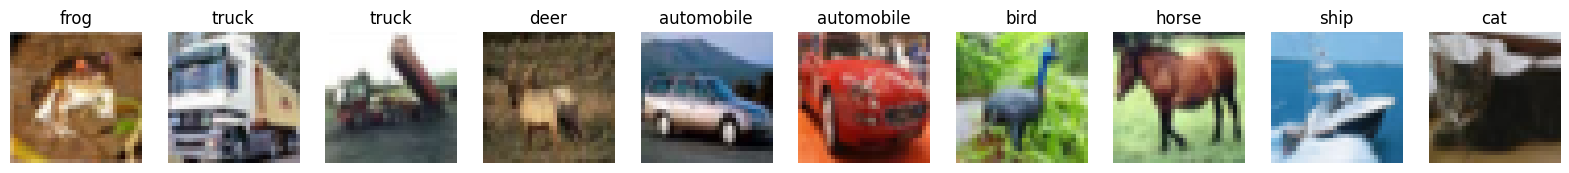

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

def load_cifar_batch(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Specify the folder where the CIFAR-10 batch files are
cifar10_dir = '/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar-10-python/cifar-10-batches-py'

# Load the label names
meta_data_dict = load_cifar_batch(os.path.join(cifar10_dir, 'batches.meta'))
label_names = meta_data_dict[b'label_names']

# Load all batches and concatenate the images
all_train_images = []
all_train_labels = []
for i in range(1, 6):  # Assuming there are 5 batches named data_batch_1, data_batch_2, ..., data_batch_5
    batch_dict = load_cifar_batch(os.path.join(cifar10_dir, f'data_batch_{i}'))
    batch_images = batch_dict[b'data']
    batch_labels = batch_dict[b'labels']
    batch_images = batch_images.reshape((len(batch_images), 3, 32, 32)).transpose(0, 2, 3, 1)
    all_train_images.append(batch_images)
    all_train_labels.extend(batch_labels)

# Concatenate all batches into a single array
train_images = np.concatenate(all_train_images, axis=0)
train_labels = np.array(all_train_labels)

# Display the first 10 images and labels
plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i])#.transpose(1,2,0))
    plt.title(label_names[train_labels[i]].decode('utf-8'))  # Decoding from bytes to string
    plt.axis('off')
plt.show()

In [8]:
train_images.shape

(50000, 32, 32, 3)

#### validation

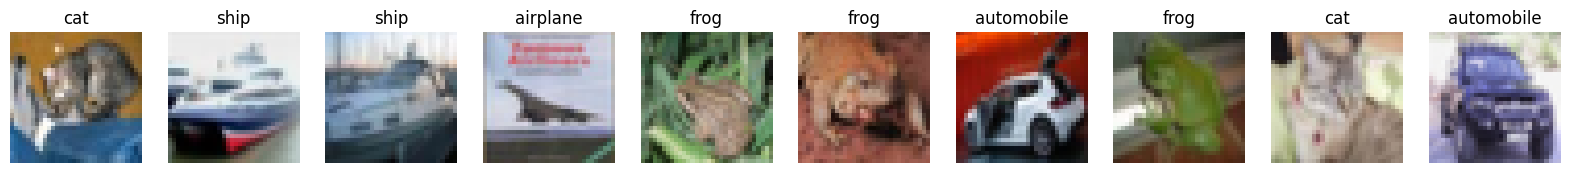

In [9]:
val_batch = load_cifar_batch(os.path.join(cifar10_dir, 'test_batch'))
val_images = val_batch[b'data']
val_labels = val_batch[b'labels']

# Reshape the images
val_images = val_images.reshape((10000, 3, 32, 32)).transpose(0, 2, 3, 1)

# Display the first 10 images and labels
plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(val_images[i])#.transpose(1,2,0))
    plt.title(label_names[val_labels[i]].decode('utf-8'))  # Decoding from bytes to string
    plt.axis('off')
plt.show()

**test**

In [10]:
# Read the test file, note that it has no labels and needs to be used with your model inference to predict outputs.

def load_cifar_batch(file):
    with open(file, 'rb') as fo:
        batch = pickle.load(fo, encoding='bytes')
    return batch

# Load the batch
cifar10_batch = load_cifar_batch('/kaggle/input/deep-learning-mini-project-spring-24-nyu/cifar_test_nolabels.pkl')

# Extract images
test_images = cifar10_batch[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1) 

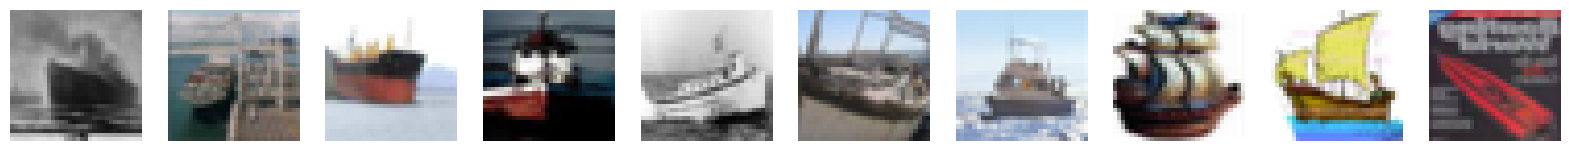

In [11]:
# Display the first 10 images and labels
plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i])#.transpose(1,2,0))
    #plt.title(label_names[val_labels[i]].decode('utf-8'))  # Decoding from bytes to string
    plt.axis('off')
plt.show()

In [12]:
train_images.shape

(50000, 32, 32, 3)

### Data Preprocessing

In [13]:
batch_size = 128
# Define transformations
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [14]:
from torch.utils.data import Dataset

class CIFAR10Dataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label
    
# Create training dataset
train_dataset = CIFAR10Dataset(train_images, train_labels, transform=transform_train)
val_dataset = CIFAR10Dataset(val_images, val_labels, transform=transform_test)

In [15]:
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

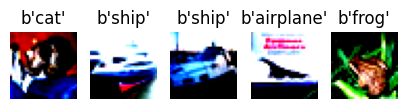

In [16]:
import matplotlib.pyplot as plt

# Get a batch of data from the trainloader
batch_images, batch_labels = next(iter(valloader))
# Plot the images with labels
plt.figure(figsize=(5, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    #plt.imshow(train_images[i].transpose(1, 2, 0))
    plt.imshow(batch_images[i].permute(1, 2, 0))  # Permute dimensions for displaying image correctly
    plt.title(label_names[batch_labels[i]])  # Assuming label_names is defined
    plt.axis('off')
plt.show()

In [17]:
'''ResNet in PyTorch.

For Pre-activation ResNet, see 'preact_resnet.py'.

Reference:
[1] Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun
    Deep Residual Learning for Image Recognition. arXiv:1512.03385
'''
import torch
import torch.nn as nn
import torch.nn.functional as F 
import numpy as np 

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, conv_kernel_size=3, shortcut_kernel_size=1, drop=0.4):
        """
        Convolutional Layer kernel size Fi 
        Skip connection (shortcut) kernel size Ki 
        """
        super(BasicBlock, self).__init__()
        self.drop = drop 
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=conv_kernel_size, stride=stride, padding=int(conv_kernel_size/2), bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=conv_kernel_size,stride=1, padding=int(conv_kernel_size/2), bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,kernel_size=shortcut_kernel_size, stride=stride, padding=int(shortcut_kernel_size/2), bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )
        if self.drop: self.dropout = nn.Dropout(self.drop)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        if self.drop: out = self.dropout(out)
        return out


    
class BottleNeck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1, conv_kernel_size=3, shortcut_kernel_size=1, drop=0.4):
        """
        Convolutional Layer kernel size Fi 
        Skip connection (shortcut) kernel size Ki 
        """
        super(BottleNeck, self).__init__()
        self.drop = drop 
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=conv_kernel_size, stride=stride, padding=int(conv_kernel_size/2), bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion*planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=shortcut_kernel_size, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )
        if self.drop: self.dropout = nn.Dropout(self.drop)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = F.relu(out)
        if self.drop: out = self.dropout(out)
        return out

    
def conv1x1(in_channels,
            out_channels,
            stride=1,
            groups=1,
            bias=False):
    """
    Convolution 1x1 layer.
    Parameters:
    ----------
    in_channels : int
        Number of input channels.
    out_channels : int
        Number of output channels.
    stride : int or tuple/list of 2 int, default 1
        Strides of the convolution.
    groups : int, default 1
        Number of groups.
    bias : bool, default False
        Whether the layer uses a bias vector.
    """
    return nn.Conv2d(
        in_channels=in_channels,
        out_channels=out_channels,
        kernel_size=1,
        stride=stride,
        groups=groups,
        bias=bias)

class SEBlock(nn.Module):
    """
    Squeeze-and-Excitation block from 'Squeeze-and-Excitation Networks,' https://arxiv.org/abs/1709.01507.
    Parameters:
    ----------
    channels : int
        Number of channels.
    reduction : int, default 16
        Squeeze reduction value.
    """
    def __init__(self,
                 channels,
                 reduction=16):
        super(SEBlock, self).__init__()
        mid_cannels = channels // reduction

        self.pool = nn.AdaptiveAvgPool2d(output_size=1)
        self.conv1 = conv1x1(
            in_channels=channels,
            out_channels=mid_cannels,
            bias=True)
        self.activ = nn.ReLU(inplace=True) 

        self.conv2 = conv1x1(
            in_channels=mid_cannels,
            out_channels=channels,
            bias=True)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        w = self.pool(x)
        w = self.conv1(w)
        w = self.activ(w)
        w = self.conv2(w)
        w = self.sigmoid(w)
        x = x * w
        return x


class ResNet(nn.Module):
    def __init__(
            self, 
            block, 
            num_blocks, 
            conv_kernel_sizes=None, 
            shortcut_kernel_sizes=None,
            num_classes=10, 
            num_channels=32, 
            avg_pool_kernel_size=4, 
            drop=None, 
            squeeze_and_excitation=None):
        super(ResNet, self).__init__()
        self.in_planes = num_channels
        # self.avg_pool_kernel_size = avg_pool_kernel_size 
        self.avg_pool_kernel_size = int(32 / (2**(len(num_blocks)-1)))
        
        """
        # of channels Ci 
        """
        self.num_channels = num_channels
        self.conv1 = nn.Conv2d(3, self.num_channels, kernel_size=3,stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(self.num_channels) 

        self.drop = drop 
        self.squeeze_and_excitation = squeeze_and_excitation 

        if self.squeeze_and_excitation: 
            self.seblock = SEBlock(channels=self.num_channels) 

        """
        # of Residual Layers N 
        # of Residual Blocks Bi 
        """
        self.residual_layers = [] 
        for n in range(len(num_blocks)): 
            stride = 1 if n==0 else 2 # stride=1 for first residual layer, and stride=2 for the remaining layers 
            conv_kernel_size = conv_kernel_sizes[n] if conv_kernel_sizes else 3 # setting default kernel size of block's convolutional layers 
            shortcut_kernel_size = shortcut_kernel_sizes[n] if shortcut_kernel_sizes else 1 # setting default kernel size of block's skip connection (shortcut) layers 
            self.residual_layers.append(self._make_layer(
                                                    block, 
                                                    self.num_channels*(2**n), 
                                                    num_blocks[n], 
                                                    stride=stride, 
                                                    conv_kernel_size=conv_kernel_size, 
                                                    shortcut_kernel_size=shortcut_kernel_size)) 

        self.residual_layers = nn.ModuleList(self.residual_layers)
        self.linear = nn.Linear(self.num_channels*(2**n)*block.expansion, num_classes) 
        """
        Dropout layer 
        """
        if self.drop: 
            self.dropout = nn.Dropout(self.drop) # Define proportion or neurons to dropout

    def _make_layer(self, block, planes, num_blocks, stride, conv_kernel_size, shortcut_kernel_size):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride, conv_kernel_size, shortcut_kernel_size, drop=self.drop))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        if self.squeeze_and_excitation: out = self.seblock(out) 
        for layer in self.residual_layers: 
            out = layer(out)         
        """
        Average pool kernel size 
        """
        out = F.avg_pool2d(out, self.avg_pool_kernel_size)
        out = out.view(out.size(0), -1)
        if self.drop: out = self.dropout(out)
        out = self.linear(out)
        return out


def Model(config=None):
    net = ResNet(
        block= BottleNeck,          
        num_blocks=[3, 4, 6, 3],  # Number of residual blocks in each stage
        conv_kernel_sizes=[3, 3, 3, 3],  # Convolutional kernel sizes for each stage
        shortcut_kernel_sizes=[1, 1, 1, 1],  # Skip connection kernel sizes for each stage
        num_channels=64,  # Number of channels in the first stage
        avg_pool_kernel_size=8,  # Average pooling kernel size
        drop=0.0,  # Dropout probability (set to 0.0 for no dropout)
        squeeze_and_excitation=1  # Enable Squeeze-and-Excitation block
    )
    
    return net

In [18]:
model = Model() 
net = model.to(device)
if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True

In [19]:
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler

optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0005) 
optimizer = Lookahead(optimizer, k=5, alpha=0.5)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
criterion = nn.CrossEntropyLoss()

## Mixup

In [20]:
from torch.autograd import Variable
def mixup_data(x, y, alpha=1.0):
        if alpha > 0:
            lam = np.random.beta(alpha, alpha)
        else:
            lam = 1

        batch_size = x.size()[0]
        if device == "cuda":
            index = torch.randperm(batch_size).cuda()
        else:
            index = torch.randperm(batch_size)

        mixed_x = lam * x + (1 - lam) * x[index, :]
        y_a, y_b = y, y[index]
        return mixed_x, y_a, y_b, lam
    
def mixup_Loss(Loss, pred, y_a, y_b, lam):
    return lam * Loss(pred, y_a) + (1 - lam) * Loss(pred, y_b)

# Mixup train
def mixupTrain(epoch, config):
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    train_losses = [] 
    train_acc = [] 

    alpha = 0.9
    for batch_idx, data in enumerate(trainloader):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
            
        images, targets_a, targets_b, lam = mixup_data(images, labels, alpha)
        images, targets_a, targets_b = map(Variable, (images, targets_a, targets_b))

        if isinstance(optimizer, Lookahead):
            optimizer.optimizer.zero_grad()
        else:
            optimizer.zero_grad()
            
        outputs = net(images)
        loss = mixup_Loss(criterion, outputs, targets_a, targets_b, lam)
        loss.backward()
        nn.utils.clip_grad_value_(net.parameters(), clip_value=0.1) 
        optimizer.step()
        
        train_loss += loss.item()
        predicted = torch.argmax(outputs,dim=1)
        
        train_losses.append(train_loss)
        #_, predicted = outputs.max(1)
        total += labels.size(0)
        #correct += predicted.eq(labels).sum().item() 
        correct += lam * predicted.eq(targets_a).sum().item() + (1 - lam) * predicted.eq(targets_b).sum().item()
        train_acc.append(100.*correct/total)     
        #train_acc = 100.0 * train_acc / len(trainData)
        progress_bar(batch_idx, len(trainloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                     % (train_loss/(batch_idx+1), 100.*correct/total, correct, total))

In [21]:
import torch.nn.functional as F, torch.backends.cudnn as cudnn  

def train(epoch, config):
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    train_losses = [] 
    train_acc = [] 
    
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        if isinstance(optimizer, Lookahead):
            optimizer.optimizer.zero_grad()
        else:
            optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        nn.utils.clip_grad_value_(net.parameters(), clip_value=0.1) 
        optimizer.step()

        train_loss += loss.item()
        train_losses.append(train_loss)
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item() 

        train_acc.append(100.*correct/total) 
        progress_bar(batch_idx, len(trainloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                     % (train_loss/(batch_idx+1), 100.*correct/total, correct, total))
        
        
def test(epoch, config, savename):
    global best_acc
    net.eval()
    test_loss = 0
    test_losses = [] 
    test_acc = [] 
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(valloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            test_losses.append(test_loss)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item() 
            test_acc.append(100.*correct/total) 
            progress_bar(batch_idx, len(valloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                         % (test_loss/(batch_idx+1), 100.*correct/total, correct, total)) 
        
    # Save checkpoint if accuracy improved
    acc = 100.*correct/total
    if acc > best_acc:
        print('Saving..')
        state = {
            'net': net.state_dict(),
            'acc': acc,
            'epoch': epoch,
        }
        if not os.path.isdir('checkpoint'):
            os.mkdir('checkpoint')
        torch.save(state, './checkpoint/ckpt.pth')
        best_acc = acc


In [22]:
best_acc = 0 
start_epoch = 0  
config = {'resume_ckpt': 0}
if config["resume_ckpt"]:        
    # Load checkpoint.
    print('==> Resuming from checkpoint..')
    checkpoint = torch.load('/kaggle/input/saved_model/pytorch/1/1/ckpt.pth')#torch.load(config["resume_ckpt"])
    net.load_state_dict(checkpoint['net'])
    best_acc = checkpoint['acc']
    start_epoch = checkpoint['epoch']
    

for epoch in range(start_epoch, 200): 
    #train(epoch, config) 
    mixupTrain(epoch, config) 
    test(epoch, config, savename="x") 
    scheduler.step()


Epoch: 0
 [================================================================>]  Step: 169ms | Tot: 1m32s | Loss: 2.266 | Acc: 21.595% (10797/50000) 391/391 
 [================================================================>]  Step: 97ms | Tot: 5s502ms | Loss: 1.806 | Acc: 36.260% (3626/10000) 79/79 
Saving..

Epoch: 1
 [================================================================>]  Step: 154ms | Tot: 1m32s | Loss: 1.893 | Acc: 32.645% (16322/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 5s401ms | Loss: 1.800 | Acc: 42.900% (4290/10000) 79/79 
Saving..

Epoch: 2
 [================================================================>]  Step: 155ms | Tot: 1m32s | Loss: 1.774 | Acc: 38.540% (19269/50000)

In [23]:
#best_checkpoint = torch.load('./checkpoint/ckpt.pth')
#net.load_state_dict(best_checkpoint['net'])

In [24]:
net.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (seblock): SEBlock(
    (pool): AdaptiveAvgPool2d(output_size=1)
    (conv1): Conv2d(64, 4, kernel_size=(1, 1), stride=(1, 1))
    (activ): ReLU(inplace=True)
    (conv2): Conv2d(4, 64, kernel_size=(1, 1), stride=(1, 1))
    (sigmoid): Sigmoid()
  )
  (residual_layers): ModuleList(
    (0): Sequential(
      (0): BottleNeck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05,

In [25]:
def predict(test_images, transform_test, net, device):
    predictions = []
    
    with torch.no_grad():
        for image in test_images:
            image = transform_test(image)
            image = image.unsqueeze(0).to(device)  # Add a batch dimension and move to device
            output = net(image)
            _, predicted = torch.max(output.data, 1)
            predictions.append(predicted.item())
    
    return predictions
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_predictions = predict(test_images, transform_test, net, device)

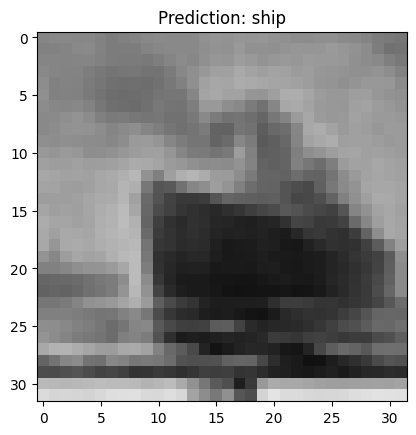

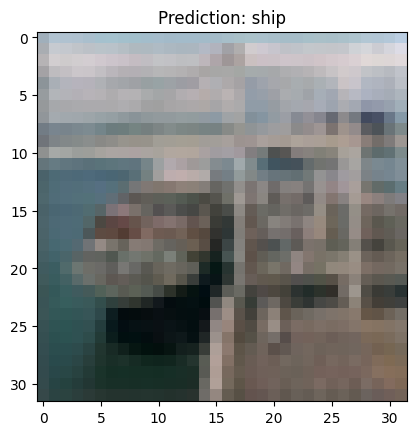

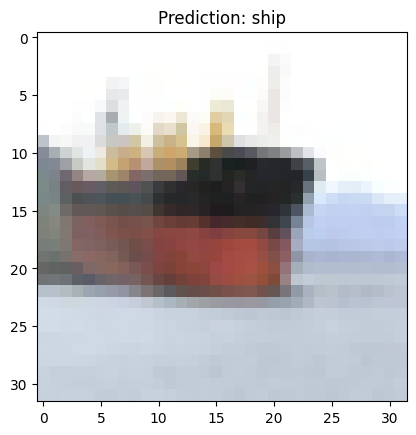

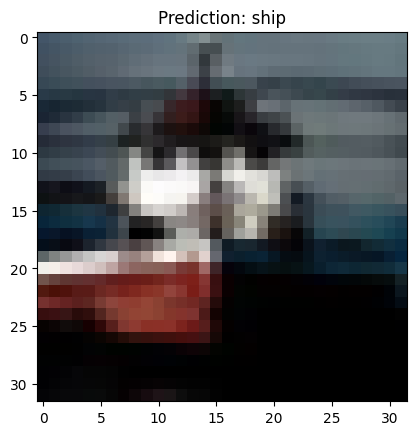

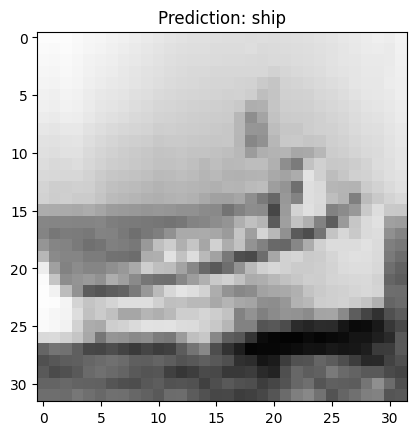

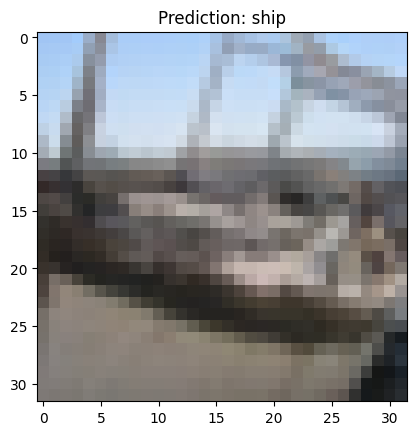

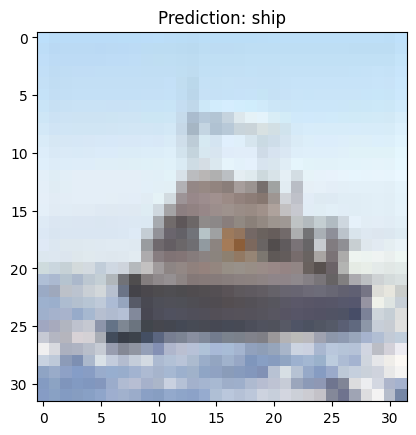

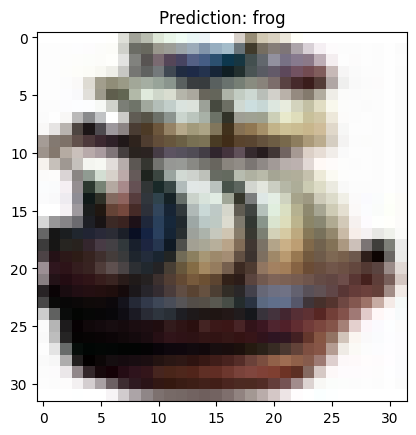

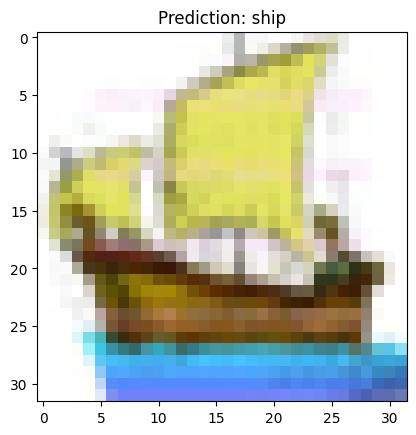

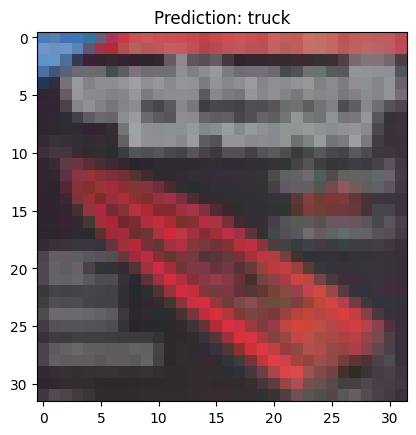

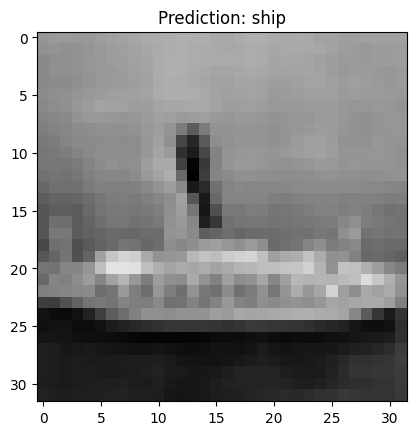

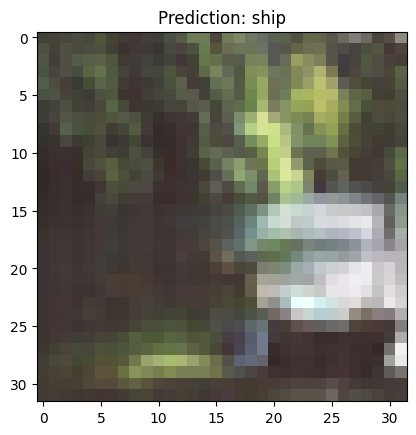

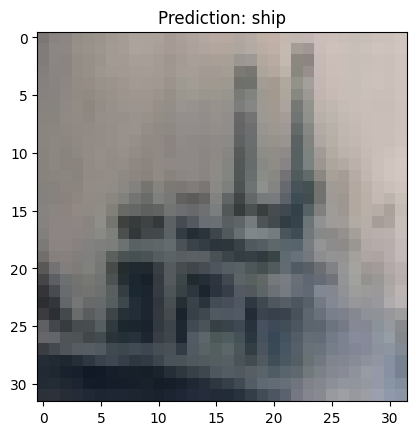

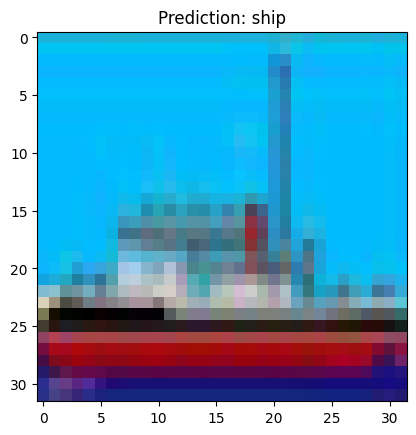

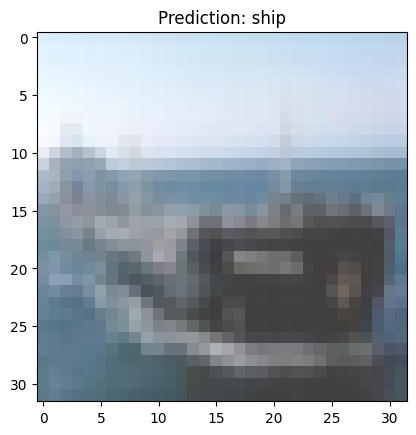

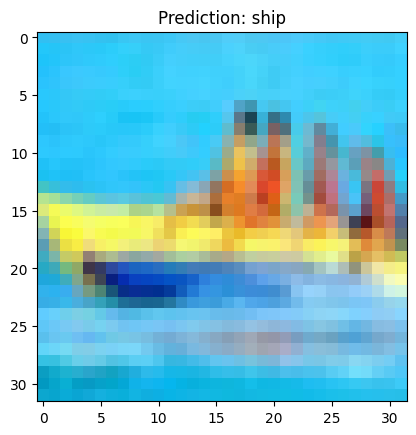

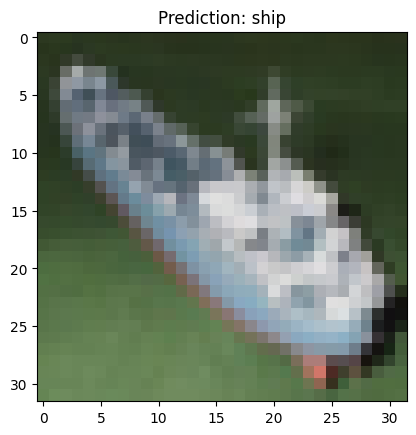

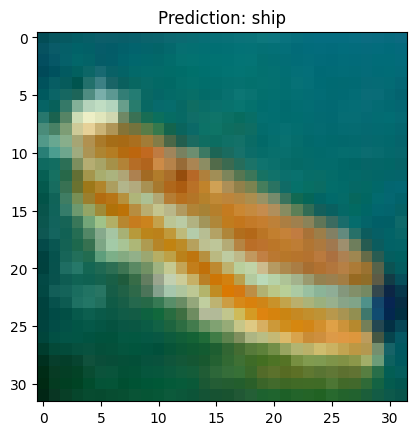

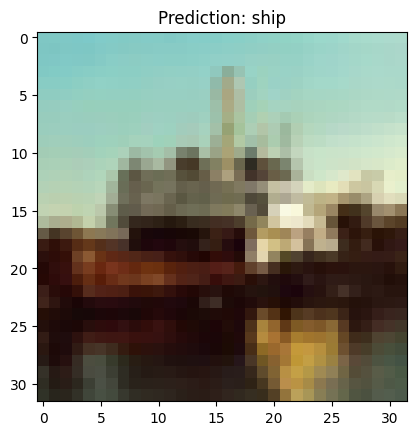

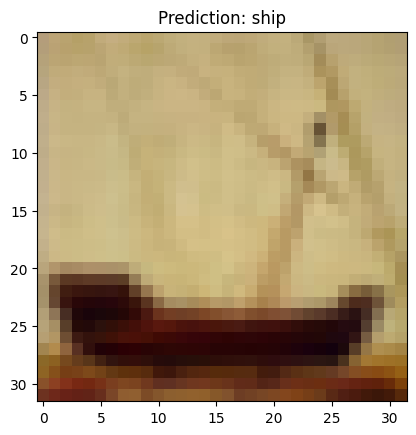

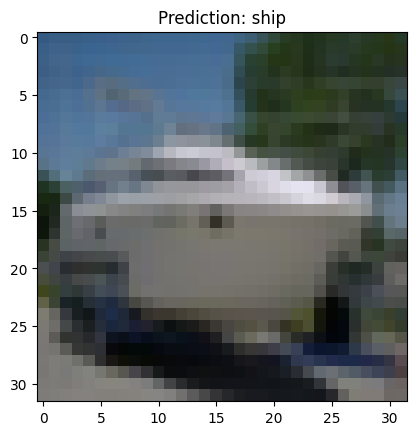

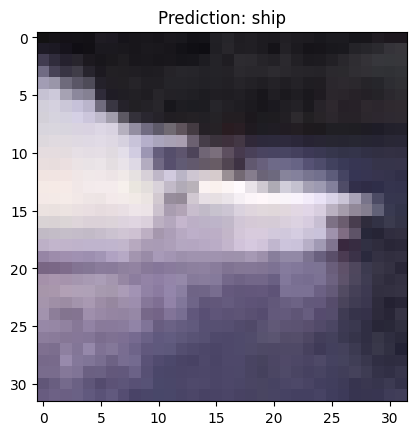

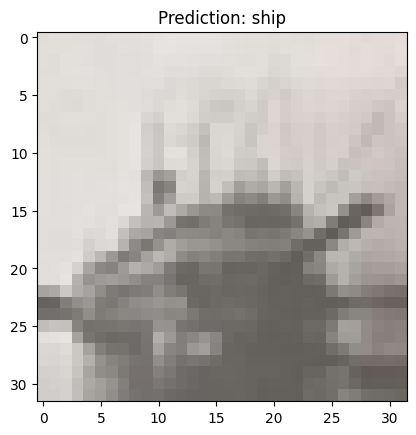

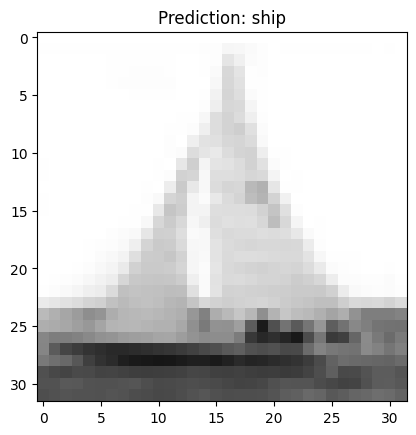

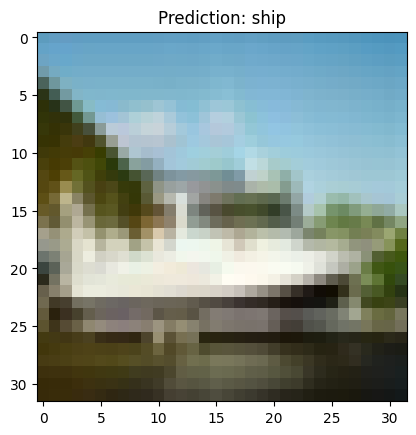

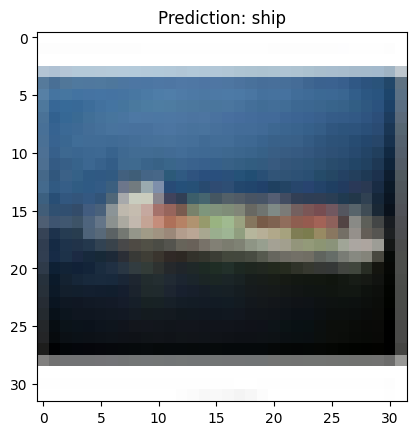

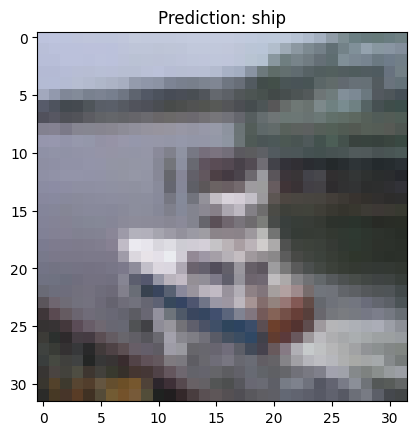

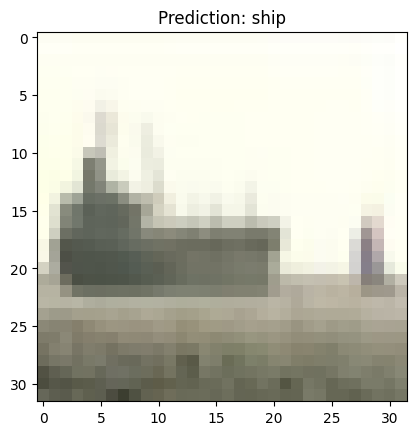

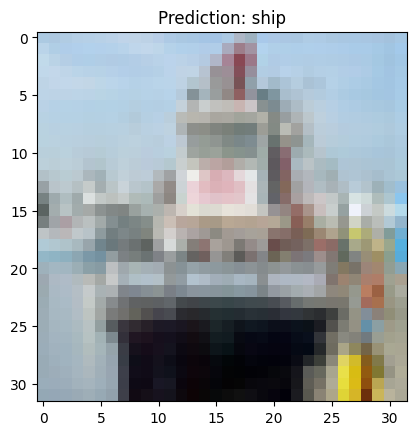

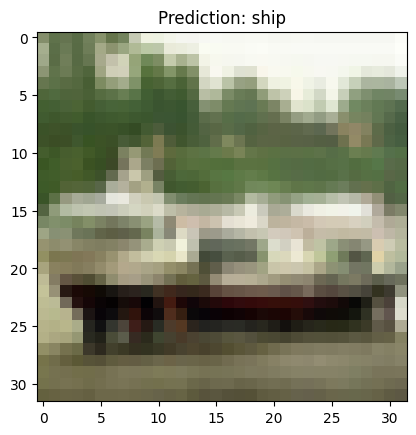

In [26]:
for i in range(30):
    plt.imshow(test_images[i])  # Transpose to (height, width, channels)
    plt.title(f'Prediction: {label_names[test_predictions[i]].decode("utf-8")}')
    plt.show()

In [27]:
submission_df = pd.DataFrame({'ID': range(len(test_predictions)), 'Labels': test_predictions})

# Save DataFrame to CSV file
submission_file = 'submission.csv'
submission_df.to_csv(submission_file, index=False)

In [28]:
submission_df

,ID,Labels
0,0,8
1,1,8
2,2,8
3,3,8
4,4,8
...,...,...
9995,9995,5
9996,9996,5
9997,9997,3
9998,9998,5


In [29]:
torch.save(net.state_dict(), './checkpoint/final_model.pth')